In [1]:
# In previos chapters, we treatd the Machine Learning models and the training algorithms like black boxes.
# We didn't know how they worked... And in many cases, it is unecessary to know the details.
# But we still need to understand for the following reasons:
    # 1. Quickly know the appropriate model, training algorithm, and hyperparameters for the task
    # 2. Help debug issues and perform error analysis more efficiently.
    # 3. Understanding what's under the hood will help us design neural networks

In [2]:
# In this chapter we will look at the Linear Regression model: 
    # We will discuss 2 different ways to train it:
        # The first is using a direct "closed-form" equation that directly computes the model parameters that best fit the training set.
        # Second is an iterative optimization approach called Gradient Descent that slowly tweak the model parameters until the best fit is reached.

# Next we will look at the Polynomial Regression model for nonlinear datasets:
    # Specifically, since there are more parameters in this model, there is a greater tendency for overfitting. 
    # We will look at methods to minimize overfitting.
    
# Next we will look at the Logistic Regression Model

# Finally, we will look at the Softmax Regression Model

In [3]:
# A linear regression model makes a prediction by simply computing a weighted sum of the input features, plus a constant called a bias term.
# To measure the performance of this Regression Model, we use the Root Mean Square Error(RMSE). The lower the RMSE, the better. All of this also applies to the Mean Square Error (MSE)

In [4]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# To make this notebook's output stable across runs:
np.random.seed(42)

# To plot pretty figures:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving_figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
# Ignore useless warnings (See SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Linear Regression Using the Normal Equation

In [5]:
# Let's generate some linear-looking data to test the normal equation on:

import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

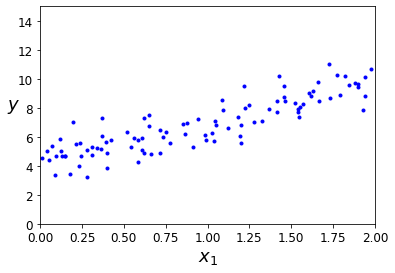

In [6]:
# Plot this randomly generated linear data:

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()


In [7]:
# Let's compute the value of Theta that minimizes error or the cost function:
# We will usethe inv() function from Numpy's Linear Algebra module(np.linalg) to compute the inverse matrix
# And the dot() method for matrix multiplication

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
# The actual function w used to generate the data is y=4 + 3x + Gaussian Noise.
# Let's see what the equation found:

theta_best

# The ideal parameters would have been (4, 3) but the noise made it difficult.

array([[4.21509616],
       [2.77011339]])

In [9]:
# Now we can make predictions using the vector parameter:
    
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

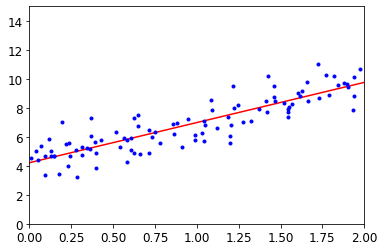

In [10]:
# Now let's plot the model's predictions:

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

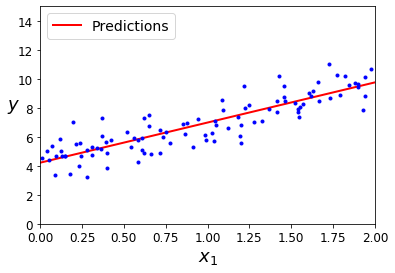

In [11]:
# The figure in the book actually corresponds to the following code:

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [12]:
# Now we will perform linear regression with Scikit-Learn:

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

# The code above gives the parameters for the linear function for modeling a specific set of linear data.

(array([4.21509616]), array([[2.77011339]]))

In [13]:
# The LinearRegression class is based on the scipy.linalg.lstsq() function (The name stands for "least squares"), which we could call directly:

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [14]:
# This function computes X=y where X+ is the pseudoinverse of X(specifically the Moore-Penrose inverse).
# You can us np.linalg.pinv() to compute the pseudoinverse directly:

np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

In [15]:
# In the book, the author implied that the LinearRegression class was based on the Normal Equation. This was an error.
# Instead, it is based on the pseudoinverse, which relies on the Singular Value Decomposition(SVD) matrix decomposition of X.

In [16]:
# We are implementing an algorithm to progressively change the gradient descent steps until the rate of change is equal to zero:

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta -eta * gradients

In [17]:
# Now let's look at the resulting theta:

theta

# You can see in the vector below that Gradient Descent found the same results as the Normal Equation we used previously.

array([[4.21509616],
       [2.77011339]])

In [18]:
# But what if we changed the learning rate(eta)? 
# Remember that the learning rate are the progressive steps taken to minimize the cost function.
# We will make some visual plots that show the first 10 steps of Gradient Descent using three different learning rates:

theta_path_bgd =[]

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration >0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
             

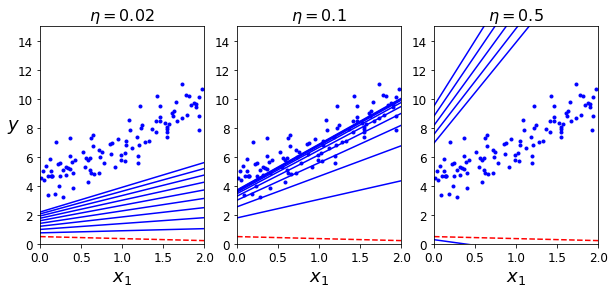

In [19]:
np.random.seed(42)
theta = np.random.randn(2,1) #random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [20]:
# You can see in the above plots the effectiveness of different learning rates. Some are too low and will take too long to find the parameters. Others are too high and actually move further away from the solution. And some are just right.
# To find a good learning rate you can use grid search. However you should limit the number of iterations so that grid search can eliminate models that take too long to converge.
# You may be wondering how to set the number of iterations. Too low and you will be too far away from the optimal solution when the algorithm stops.
# Too high of a number of iterations and you will waste time while the model paramters don't change.
# A simple solution is to set the number of iterations very high, but to interrupt the algorithm when the gradient vector becomes tiny (the tolerance.)

# Stochastic Gradient Descent

In [21]:
# The main problem with batch gradient descent is that at it uses the whole training set to compute gradients at every step. This makes it very slow.
# Stochastic Gradient descent is the opposite, it chooses a random instance at every step and then calculates/refines the gradient off that random instance. It is much faster.
# One problem is that due to the random nature of this algorithm, even when the algorithm reaches the optimal cost function... It will keep bouncing around that area producing a good but not optimal function.
# But one advantage of this algorithm is that it can randomly escape a local minima if given time... And can reach the globally optimal solution.

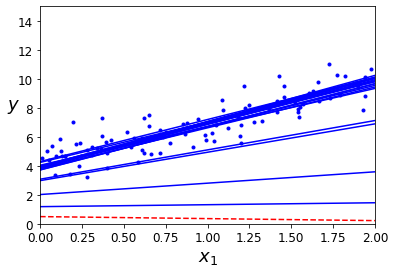

In [22]:
# This code implements Stochastic Gradient Descent using a simple learning schedule:

theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()
        
# By convention, we iterate by rounds of m iterations; each round is called an epoch.
# The image plot below shows the first 20 steps that were picked randomly.
 

In [23]:
# While the Batch Gradient Descent code iterated 1000 times through the whole training set, Stochastic Gradient Descent goes through the code 50 times and reaches a fairly good solution:

theta

array([[4.21076011],
       [2.74856079]])

In [24]:
# To perform linear regression using  SGD with Scikit-Learn,you can use the SGDRegressor class, which defaults to optimizing the squared error cost function.
# The following code runs 50 epochs, starting with a learning rate of 0.1, using the default learning schedule.
# Also it doesn't use any regularization (penalty=None)

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [25]:
# Once again we find a solution very close to the Normal Equation:

sgd_reg.intercept_, sgd_reg.coef_


(array([4.16782089]), array([2.72603052]))

# Mini-batch gradient descent

In [26]:
# Instead of computing gradients off the entire training set, or of one random instance, mini-batch computes gradients onsmall random sets. 
# The main advantage of mini-batch GD over stochastic GD is that you can take advantage of hardware GPU support for matrix operations.
# Mini Batch GD is less erratic then Stochastic GD. Therefore it can move close to the Minima.
# However the downside is that since there is less randomness... There is a greater chance that the algorithm can get stuck in a local minima compared to Stochastic GD.

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [27]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [28]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)



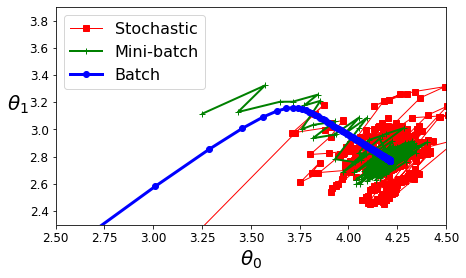

In [29]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

plt.show()


# Polynomial Regression

In [30]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [31]:
# What if your data is more complex than a linear straight line?
# You can actually use a linear model to fit nonlinear data by adding powers of each feature as new features.

# To test this, let's generate some nonlinear data based on a quadratic equation:

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + np.random.randn(m, 1)

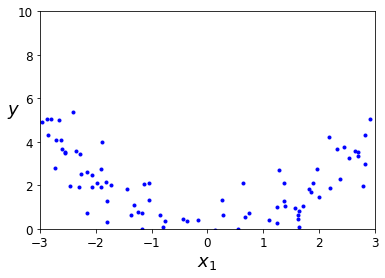

In [32]:
# Let's show a visual representation of the randomized quadratic equation:

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [33]:
# Since a straight line won't fit this data, we need something else:

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [34]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [35]:
# X_poly now contains the original feature of X plus the square of this feature. 
# Now you can fit a LinearRegression Model to this extended training data:

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([-0.21865419]), array([[-0.06633107,  0.56456263]]))

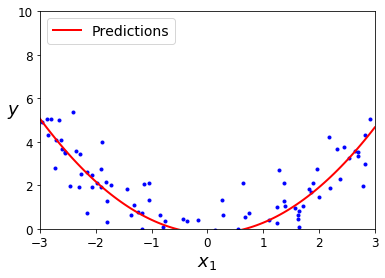

In [36]:
# Let's look at the visual representation of this polynomial model:

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()


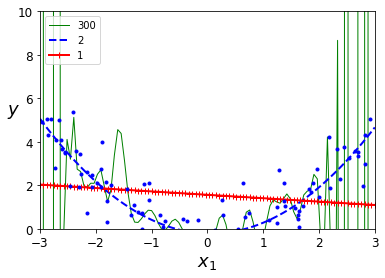

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

# Learning Curves

In [39]:
# How can you tell if a high degree polynomial model is overfitting the data?
    # In the earlier chapters, we used cross-validation. If a model performs well on the training data, but does poorly on cross-validation, then the model is overfitting.
# Another way to test is to look at learning curves: plots of the model's performance on training set and validation set as a function of the the training set size.

# The following code plos the learning curves of a model given some training data:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

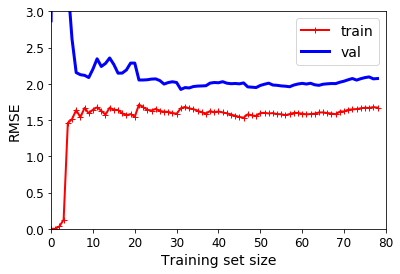

In [40]:
# Let's look at the learning curves of the plain Linear Regression Model:

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

# The below plot shows that a line is underfitting the data. The RMSE remains high and constant no matter how large the training set size becomes.
# Also the Validation Score doesn't change no matter how large the training set becomes.
# If a model is underfitting the data, you will need to choose a more complex model.

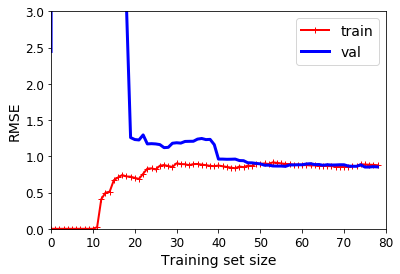

In [41]:
# Now let's take a look at the learning curves of a 10th-degree polynomial model based on the same data:

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

In [42]:
# There are two main differences from the previous plot:
# First the error in the trainnig data is much lower in the 10th degree polynomial model then with the Linear model.
# The second difference is that there is a gap between the predictions scores and the validation scores. This means that the model performs better on the training data then the validation data. An overfitting model.

# Remember that the red colored train line= RMSE score, and the blue colored val line= Cross-Validation Scores.


In [43]:
# A model's generalization error can be exprressed as the sum of three very different errors:
    # Bias: Error due to wrong assumptions. For example, assuming the data is linear when it is quadratic. Will cause undefitting of data.
    # Variance: Error due to a model's excessive sensitivity to small variations in training data. Caused by excessive degrees of freedom( Ploynomial too high). Will cause overfitting of data.
    # Irreducible Error: is due to the noisiness of the data itself. The only way to reduce this error is to clean up the data (e.g, fix data sources such as broken sensors, or detect and remove outliers)

# Regularized Linear Models

In [44]:
# Regularizing is an attempt to reduce overfitting of data by reducing the degrees of freedom in the model.
    # For a polynomial model, reduce the number of polynomial degrees
    # For a Regression Model, restrain the weights. We will discuss three methods for restraining the weights:
        # Ridge Regression
        # Lasso Regression
        # Elastic Net

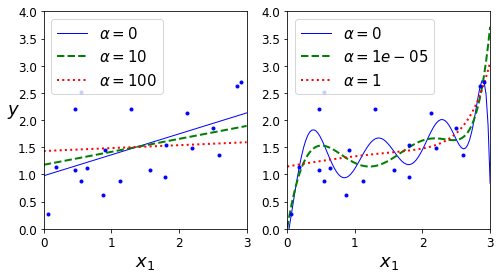

In [45]:
# In Ridge Regression, a regularization term is added to the cost function which forces the learning algorithm to not only fit the data but to keep the weights as small as possible.
# The regularization term is only added to the cost function during training. Once the model is trained, you want to evaluate performance using the unregularized performance measure.
# If the regularization term is 0, then Ridge Regression is just linear regression. If it is too largem then all the weights end up close to zero causing a flatline going through the data's mean.

# Here is how to perform the Ridge Regression using Scikit-Learn:

from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 +0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])
            
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()


# The out put below is the regularization term which can then be added to the cost function to determine the weights of the model.

In [46]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [47]:
# Now instead of directly calculating Ridge Regression, we will use Stochastic Gradient Descent:

sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.49905184])

In [48]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])



array([[1.5507201]])

# Lasso Regression

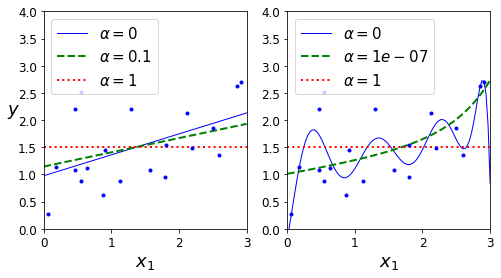

In [49]:
# Lasso stands for Least Absolute Shrinkage and Selection Operator Regression. 
# Like Ridge Regression, Lasso also adds a regularization term to the cost function... But does a different form.
# One unique feature of Lasso Regression is that it tends to completely eliminate the weights of the least important features.
# Lasso Regression automatically performs feature selection and outputs a sparse model

from sklearn.linear_model import Lasso

plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.show()

In [50]:
# Below is a small Scikit-Learn example using the Lasso class.
# Note that you could also use an SGDRegressor(penalty="l1")

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

# The below output is the regularization factor that can be added to minimize the weights on the parameters.

array([1.53788174])

# Elastic Net

In [51]:
# Elastic Net is the middle ground between Ridge Regression and Lasso Regression.
# It is a controllable ratio between the Ridge's and Lasso's Regularization Term.
# When r=0, Elastic net is equivalent to Ridge Regression. When r=1, it is equivalent to Lasso Regression.


In [52]:
# So how do you decide between the regularization types?
# It is almost always preferable to have some regularization. So you want to avoid plain Linear Regression.
# Ridge is a good default, but if you suspect some features aren't that useful.. Use the Lasso or Elastic Net.
# In general, Elastic Net is preferred over Lasso because Lasso behaves erratically when:
    # Number of feautures is greater then the number of training instances.
    # Several features are strongly correlated.
    

In [53]:
# Here is an example of Elastic Net (l1_ratio corresponds to the mix ratio r, alpha controls how much you want to regularize the model):

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])


array([1.54333232])

# Early Stopping

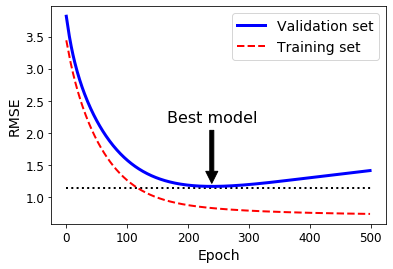

In [54]:
# Early stopping is a method of regularization where a learning algortihm stops training as soon as the validation error reaches a minimum.
# The validation error goes down as the algorithm is trained over time. It reaches a minimum and then starts to rise again. As soon as it begines rising, the algorithm is becoming overfitted to the training set.
# Early stopping is an extremely efficient and simple technique.

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler()),
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                      tol=-np.infty,
                      penalty=None,
                      eta0=0.0005,
                      warm_start=True,
                      learning_rate="constant",
                      random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha = "center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16
            )

best_val_rmse -= 0.03 # To make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [55]:
# Here is a basic implementation of Early Stopping:

# We first prepare the data
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)


In [56]:
# I don't know what the hell this code means:

best_epoch, best_model

# It might just be the parameters for the equation that leads to a model with the lowest RMSE.

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

# Logistic Regression

In [57]:
# Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class (For example, is the email spam?)
# If the estimated probability is >50%, the model predicts the instance belongs to that class (positive=1)
# Or else it doesn't belong to the class(negative=0)
# Logistic Regression is a binary classifier

In [58]:
# Works just like linear regression. Computes a weighted sum of input features plus a bias term. But instead of direct output, it outputs the logistic of the result

In [59]:
# Let's use the iris dataset to illustrate Logistic Regression. This famous dataset contains the sepal and petal length and width of 150 iris flowers of 3 different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica
# We will try to build a classifier to detect the Iris-Virginica type based only on the petal width feature:

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [60]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [61]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"]==2).astype(np.int) # 1 if Iris-Virginica, else 0

In [63]:
# Now let's train the logistic regression model:

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

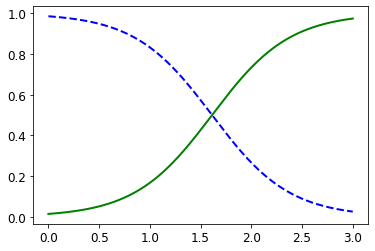

In [64]:
# Let's look at the model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm:

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

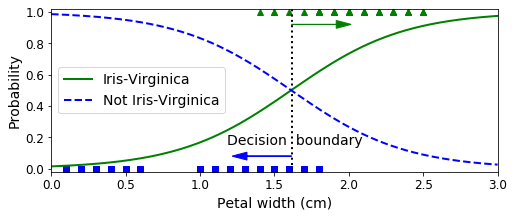

In [71]:

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [69]:
# The code below shows a prediction of whether the flower is an Iris-Virginica or not based of the input petal width in cm:

log_reg.predict([[1.7], [1.5]])

# 1.7cm is predicted as an Iris-Virginica, and 1.5 cm is not

array([1, 0])

In [72]:
# The decision boundary is the point where there is an equal probability of the datapoint being either classification:

decision_boundary

array([1.61561562])

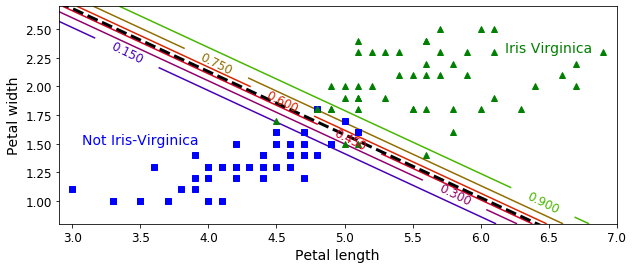

In [75]:
# The next series of code creates a graph displaying two features: The petal width and length.
# Once trained the logistic regression algorithm can identify whether a petal's combination of length and width measurements classify it as an Iris-Virginica or not.

from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)] # Petal length and width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1)
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

# In the below graph, the dashed line represents the point where the model estimates a %50 probability; the decision boundary.
# Each line represents a specific probability percentage that based off the petal length and width, that the classification is an Iris Virginica or not.


In [76]:
# Just like other linear models, Logistic Regression can be regularized using penalties.
# The hyperparameter controlling regularization in the Scikit-Learn LogisticRegression model is not alpha as in other parameters. It is it's inverse C. The higher C is, the less the regularization. 

# Softmax Regression

In [77]:
# Softmax Regression is a method where the Logistic Regression model can generalized to support multiple classes directly without having to train and combine multiple binary classifiers.
# Softmax regression calculates a score for each class. This score determines the likelihood that a particular instance belongs to that particular class.
# The probability is calculated by applying the softmax function to score that the softmax regression model calculated.

# Softmax regression outputs only one class at a time... It can't identify an instance as belonging to multiple classes. ei identifying the names of multiple people in a picture.

In [78]:
# Let's use softmax regression to classify the iris flowers into 3 classes. Scikit-Learn's Logistic Regression uses one-v-all by default when training on more than 2 classes, but you can set the multi_class hyperparameter to "multinomial" to switch to Softmax regression.
# You mus also specify a solver that supports Softmax Regression such as "lbfgs"(see Scikit-Learn's documentation)
# This solver applies l2 regularization by default and can be controlled by the Hyperparameter C.

X = iris["data"][:, (2,3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

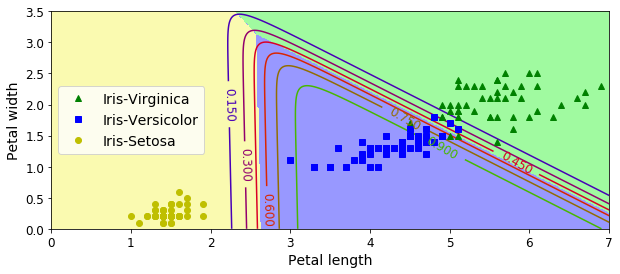

In [80]:
# This code will generate a graph showing the probabilities that a data instance will fall into a particular class of flower:

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()